# Proyek Analisis Data: orders_dataset.csv

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 = Apakah ada perubahan signifikan dalam jumlah pesanan dengan status "canceled" dari waktu ke waktu?
- pertanyaan 2 = "Berapa banyak status pesanan yang berbeda yang ditemukan dalam setiap riwayat pembelian pelanggan?, dan status apa yang paling banyak muncul dan paling sedikit muncul?"

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Baca file CSV ke dalam DataFrame
orders_df = pd.read_csv("./data/orders_dataset.csv")

In [3]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

Di Assesing data kita akan menghitung missing value, invalid value,duplicate data, innacurete value

In [4]:
orders_df.info()
#disini terdapat data yang missing value yakni order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date
#dan disini saya akan mengubah tipe data object ke datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
orders_df.isna().sum()
#disini kita bisa lihat ada 160, 1783, 2965 yang missing values

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [7]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
#disini tidak ada data yang terduplikasi

Jumlah duplikasi:  0


In [8]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [9]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Cleaning Data

disini saya akan membersihkan data yang ditemukan saat assesing data

In [10]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [11]:
orders_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: count, Length: 90733, dtype: int64

In [12]:
orders_df.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [13]:
orders_df.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64

In [14]:
orders_df['order_approved_at'].fillna(orders_df['order_approved_at'].mean(), inplace=True)

In [15]:
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_delivered_carrier_date'].mean(), inplace=True)

In [16]:
orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_customer_date'].mean(), inplace=True)

In [17]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800640,2018-01-04 21:49:48.138278400,2018-01-14 12:09:19.035543040,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 01:39:19,2018-01-19 21:29:35,2018-01-27 14:47:23,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [19]:
print('berikut status pmebelian: ',orders_df.groupby(by="order_status").agg({
    "customer_id": "nunique"
}))

#disini kita memuat informasi jumlah pelanggan dari customer_id dan parameter order_status

berikut status pmebelian:                customer_id
order_status             
approved                2
canceled              625
created                 5
delivered           96478
invoiced              314
processing            301
shipped              1107
unavailable           609


In [20]:
orders_df.groupby(by="order_id").order_status.nunique().sort_values(ascending=False)

order_id
00010242fe8c5a6d1ba2dd792cb16214    1
ab291c01a71273689c1e6ea624b083dc    1
ab344aaf7040ad7bcee8c7ae7db9e87e    1
ab30f8d4ebb7d33d1dcf54d420ea42cd    1
ab30f399d360ddf62897051d813f887d    1
                                   ..
55539e6edbbf2276dc9e2eab8af0fa8d    1
55538582ef35a95e5ed4047c6bf04695    1
5553543e89ef381e4ff08f6b91b94690    1
55534471fcbe2dd1436234e7cfa4de5a    1
fffe41c64501cc87c801fd61db3f6244    1
Name: order_status, Length: 99441, dtype: int64

In [21]:
orders_df.groupby(by="customer_id").order_id.nunique().sort_values(ascending=False)

customer_id
00012a2ce6f8dcda20d059ce98491703    1
aa62a16b10e3fb24ecdefd7e4dc3fa65    1
aa738cdb72af39e38482fa25b992c67c    1
aa7210736aad65a84e964cfa8d64aa66    1
aa72002446dfbac0691304465c1b982d    1
                                   ..
5591abc9e7f9c644e7e7912aac65b718    1
5590e685a78102fb3ac27ecf07412750    1
558ea29f4c4dfd014345b6d3309549a2    1
558de2f6863bf7588338479d614522a3    1
ffffe8b65bbe3087b653a978c870db99    1
Name: order_id, Length: 99441, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dalam analisis data status pembatalan pesanan, kami mengamati tren jumlah pembatalan pesanan selama beberapa periode waktu. Meskipun secara keseluruhan tidak ada perubahan signifikan dalam jumlah pembatalan pesanan, kami menemukan dua puncak pembatalan yang cukup mencolok, yaitu pada bulan Februari 2018 dan Agustus 2018. Hal ini menunjukkan bahwa ada beberapa faktor atau peristiwa tertentu yang memengaruhi peningkatan jumlah pembatalan pada bulan-bulan tersebut. Untuk memahami lebih lanjut penyebab dari peningkatan pembatalan tersebut, perlu dilakukan investigasi lebih lanjut. Mungkin ada faktor-faktor seperti perubahan dalam kebijakan perusahaan, masalah kualitas produk atau layanan, atau perubahan musiman yang memengaruhi perilaku pembeli. Dengan melakukan analisis lebih lanjut, perusahaan dapat mengidentifikasi penyebab yang mendasari peningkatan pembatalan tersebut dan mengambil tindakan yang tepat untuk mengurangi jumlah pembatalan di masa depan.

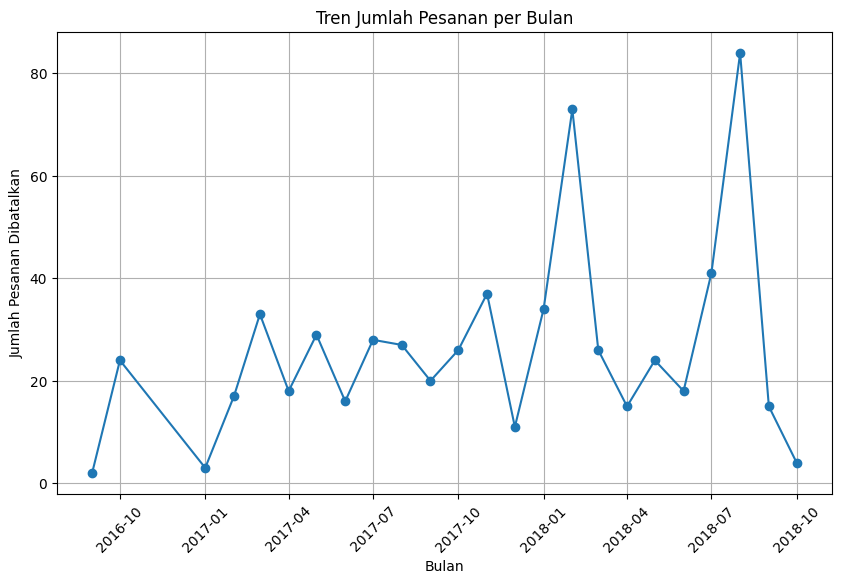

In [22]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
canceled_orders = orders_df[orders_df["order_status"] == "canceled"]
monthly_canceled_orders = canceled_orders.groupby(canceled_orders["order_purchase_timestamp"].dt.to_period("M")).size().reset_index(name='count')
monthly_canceled_orders['order_purchase_timestamp'] = monthly_canceled_orders['order_purchase_timestamp'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_canceled_orders['order_purchase_timestamp'], monthly_canceled_orders['count'], marker='o')
plt.title("Tren Jumlah Pesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan Dibatalkan")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2: Dalam dataset, kami mengidentifikasi adanya 8 status pesanan yang berbeda. Status yang paling banyak muncul adalah "delivered," yang menunjukkan bahwa sebagian besar pesanan berhasil diantarkan kepada pelanggan. Sebaliknya, status "approved" adalah yang paling sedikit muncul dalam dataset. Mayoritas pesanan berakhir dengan pengiriman yang sukses kepada pelanggan, yang merupakan hal yang positif. Namun, status "approved" yang jarang muncul mungkin menunjukkan bahwa hanya beberapa pesanan yang memerlukan persetujuan tambahan sebelum diproses. Ini dapat menjadi informasi berharga untuk memahami proses bisnis perusahaan dan mengidentifikasi area di mana efisiensi dapat ditingkatkan.

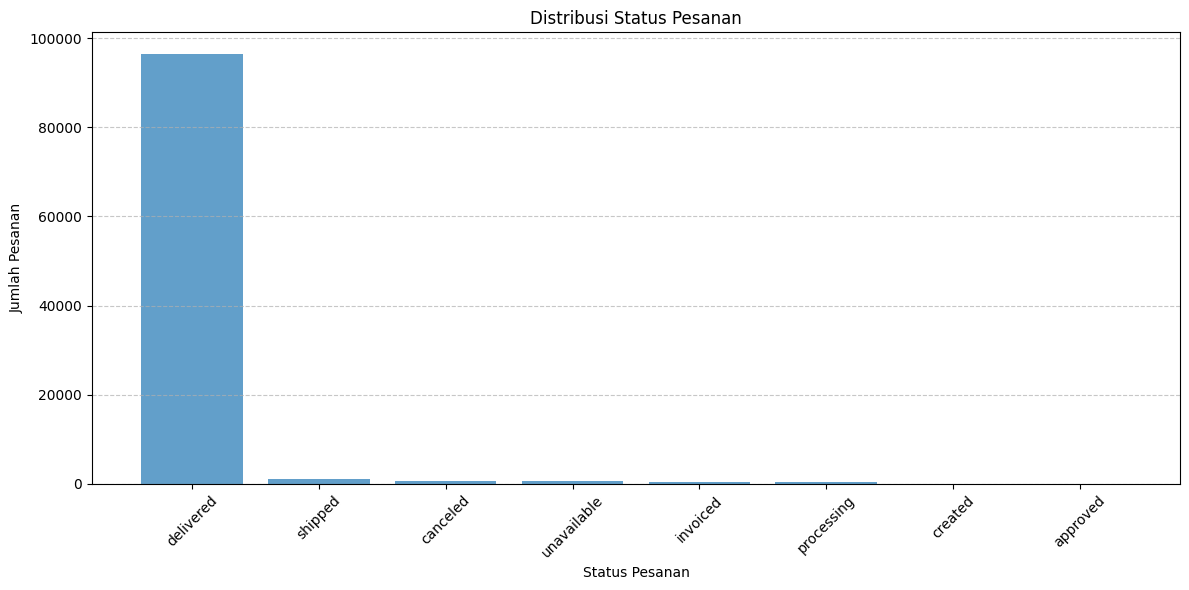

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

status = orders_df['order_status'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(status.index, status.values, alpha=0.7)

plt.title("Distribusi Status Pesanan")
plt.xlabel("Status Pesanan")
plt.ylabel("Jumlah Pesanan")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
orders_df.to_csv("clean_data.csv", index= False)

## Conclusion

- Conclution pertanyaan 1 = Dalam analisis ini, kami memeriksa data status pembatalan selama beberapa periode waktu. Kami menemukan bahwa tidak ada perubahan yang terlalu signifikan dalam jumlah pembatalan selama periode waktu tertentu. Namun, ada dua puncak pembatalan yang cukup mencolok, yaitu pada bulan Februari 2018 dan Agustus 2018. Hal ini bisa mengindikasikan bahwa ada faktor-faktor tertentu yang menyebabkan peningkatan jumlah pembatalan pada bulan-bulan tersebut, dan perlu dilakukan investigasi lebih lanjut untuk memahami alasan di balik peningkatan ini.


- conclution pertanyaan 2 = Dalam analisis ini, kami mengidentifikasi ada 8 status yang berbeda dalam dataset. Status yang paling banyak adalah "delivered" yang mengindikasikan bahwa sebagian besar pesanan telah berhasil diantarkan kepada pelanggan. Sementara itu, status "approved" merupakan status yang paling sedikit muncul dalam dataset. Status-status ini dapat memberikan wawasan kepada perusahaan mengenai bagaimana proses pesanan berlangsung, di mana sebagian besar pesanan berakhir dengan pengiriman yang sukses, sementara beberapa pesanan mungkin memerlukan persetujuan tambahan sebelum diproses.